# Assignment 2: Compare Tests for Goodness of fit

Follow the skeleton notebook Assignment 2 Test that in fact binomial and Poisson distribution look increasingly more similar to Gaussians as the mean of the distribution increases.

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

#plus importing scipy.stats
import scipy.stats


Populating the interactive namespace from numpy and matplotlib


# Normal on Normal

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



#### KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

#### AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

---

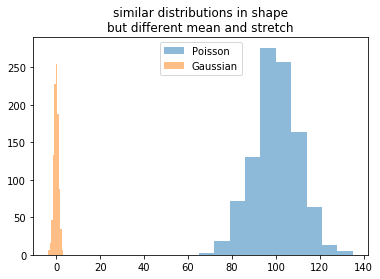

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


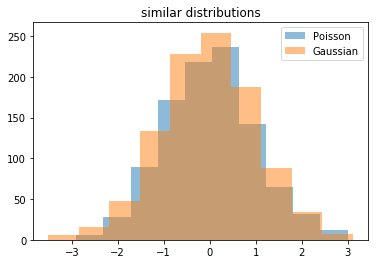

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


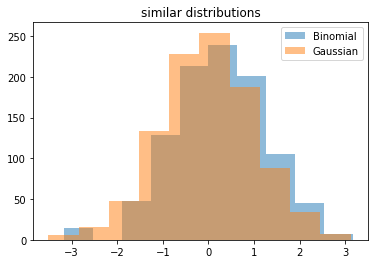

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456722, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [3]:
# From skeleton notebook

np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


### Results of the binomial to normal test 

**KS Test**<br/>
The p value is zero, so we can reject the null that they are from the same parent distribution.

**AD Test**<br/>
The statistics 15.85 is greater than the critical value (.784), so we can reject the null that they are from the same distribution. 

### Results of poisson to normal distribution

**KS Test**<br/>
The p value is about the same as the KS statistic which means that we cannot reject the null that the two come from the same distribution.

**AD Test**<br/>
The critical statistic is 0.92, which is larger than .784 so we can reject the null that they're from the same distribution. 

### Try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)

KS: The null hypothesis is that the two distributions come from the same parent.
    
AD: The null hypothesis that the sample in question is drawn from a population that follows a particular distribution. 


### KL DIVERGENCE
**empirical distribution** it wants to know the distribution y value at a location x. have to pass it the values of the distribution at some x's, not my histogram though, si I need a 
**NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data.<br/>

**model** Then I have to pass it a function for my comparison distribution evaluated at the same x-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest


then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) evaluated at the bin centers of the histogram from before

In [5]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

# you can interpret this as a distance: 
# it increases as the distributions diverge


the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


By minmizing the entropy, it means we have to do less to make the distribution resemble a normal distribution. 

# Binomial Distribution

With the binomial distribution I can change np. larger np will make the distribution look more "normal" (i.e. Gaussian). In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

You want to see how the p-value (or the test statistics) behaves as a function of increasing np. So you can plot the p-value (or the test statistics) against the np

In [6]:
# pick 100 random means - why not means 1 - 100 
mean = np.arange(1,101)
#parameter for the binomial, my arbitrary choice
p = .05 
#narray is an array of all my Ns. We find N because we know the binomial equation
narray = mean / p

In [7]:
# creating a list for each of the things we're measuring to see how they change based on their size.
bino_ks_p = []
bino_ks_s = []
bino_ad = []
bino_kl = []
# bino_chip = []
bino_chis = []

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    
    # this is the formula for binomial, divided by std of the binomial dist
    distb = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #append each value to the arrays we created above
    bino_ks_s.append(scipy.stats.kstest(distb,'norm')[0])
    
    bino_ks_p.append(scipy.stats.kstest(distb,'norm')[1])
    
    bino_ad.append(scipy.stats.anderson(distb, dist='norm')[0])
  
    # for KL 
    mybins = np.linspace(min(distb), max(distb), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    bino_kl.append(scipy.stats.entropy(np.histogram(distb, bins=mybins)[0], 
                                       scipy.stats.norm.pdf(bincenters) + n))
    
    #chi square s
    bino_chis.append(scipy.stats.chisquare(np.histogram(distb, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n))
    
#     # chi square p
#     bino_chip.append(scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0], 
#                                     scipy.stats.norm.pdf(bincenters) + n))

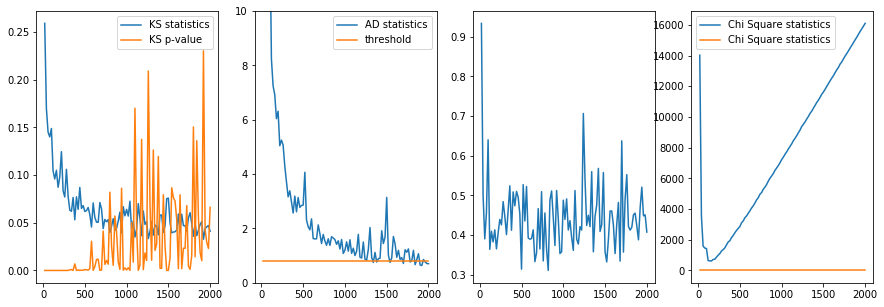

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(narray, bino_ks_s, label='KS statistics')
pl.plot(narray, bino_ks_p, label='KS p-value')
pl.legend()

fig.add_subplot(142)
pl.plot(narray, bino_ad,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(143)
pl.plot(narray, bino_kl, label='K-L (entropy)')

fig.add_subplot(144)
pl.plot(narray, bino_chis, label='Chi Square statistics')
# pl.plot(narray, bino_chip, label='Chi Square p-value')
pl.legend()

## Caption: binomial distributions increaseing in sample size
In the far right graph, we see that as the KS Statistic gets smaller, the p value increases. As p gets bigger, it means we're less likely to reject the null that they're from the same distribution. In the middle graph, we see the same pattern. As the AD statistic gets smaller, it gets closer to the rejection threshold. Finally, in the third graph, we see that entropy decreases with the KL statistic. 

# Poisson Distribution

In [9]:
# pick 100 random means - why not means 1 - 100 
# for a poisson distribution, the mean = lamda, the only parameter needed. 
# pmean is an array of means 
pmean = np.arange(1,101)

In [10]:
#loop over the different values of lambda and get the values we care about for each 
pos_ks_p = []
pos_ks_s = []
pos_ad = []
pos_kl = []
pos_chis = []

for i,l in enumerate(pmean):
    #generate the distribution with new parameters for poisson, L, size of array
    # -1 to fix on zero, divided by the standard deviation of poisson dist, which is sqrt of mean
    distp = (np.random.poisson(l, 1000) - 100) / np.sqrt(l)  
    #run the tests. 
    pos_ks_s.append(scipy.stats.kstest(distp,'norm')[0])
    pos_ks_p.append(scipy.stats.kstest(distp,'norm')[1])
    
    pos_ad.append(scipy.stats.anderson(distp, dist='norm')[0])
 
    mybins = np.linspace(min(distp), max(distp), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    pos_kl.append(scipy.stats.entropy(np.histogram(distp, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n))
    
    pos_chis.append(scipy.stats.chisquare(np.histogram(distp, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n))
    

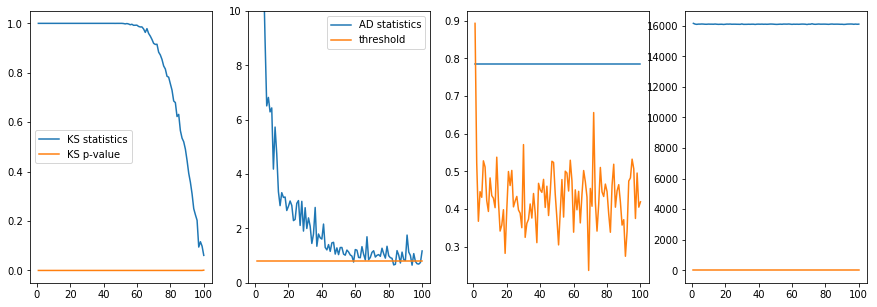

In [11]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(141)
pl.plot(pmean, pos_ks_s, label='KS statistics')
pl.plot(pmean, pos_ks_p, label='KS p-value')
pl.legend()

fig.add_subplot(142)
pl.plot(pmean, pos_ad,  label='AD statistics')
pl.plot([pmean[0], pmean[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(143)
pl.plot([pmean[0], pmean[-1]],[threshold, threshold], label="threshold")
pl.plot(pmean, pos_kl, label='K-L (entropy)')

fig.add_subplot(144)
pl.plot(pmean, pos_chis, label='Chi Square statistics')


## Caption: poisson distribution increasing in size
The scale is a bit off, but the results here are the same as with the binomial distribution. As the KS statistic gets smaller, the p value increases. As p gets bigger, it means we're less likely to reject the null that they're from the same distribution. In the middle graph, we see the same pattern. As the AD statistic gets smaller, it gets closer to the rejection threshold. Finally, in the third graph, we see that entropy decreases with the KL statistic. I'm not sure how to interpret the chi squared test.

### NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

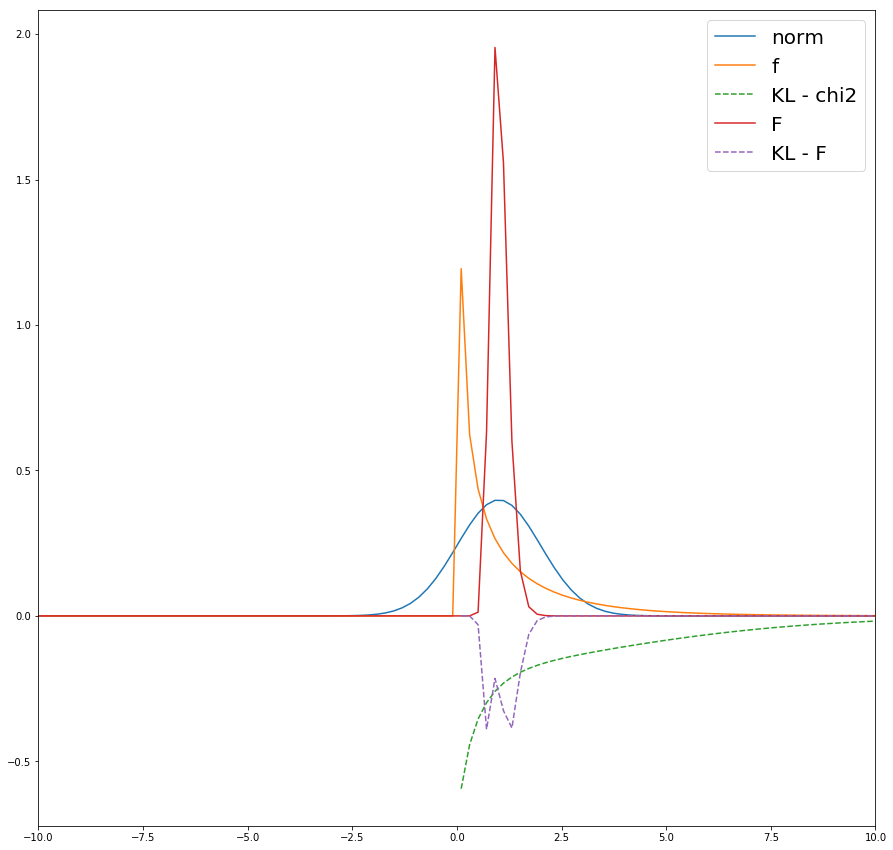

In [12]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);